In [1]:
import json 
import datetime

import numpy as np 
import pandas as pd

import networkx as nx
import matplotlib.pyplot as plt

In [2]:
twitterData = pd.read_csv("data.csv", sep=',(?=\S)', engine='python')
twitterData.head()

,id,screenName,tags,avatar,followersCount,friendsCount,lang,lastSeen,tweetId,friends
0,"""1969527638""","""LlngoMakeEmCum_""","[ ""#nationaldogday"" ]","""http://pbs.twimg.com/profile_images/534286217...",319,112,"""en""",1472271687519,"""769310701580083200""","[ ""1969574754"", ""1969295556"", ""1969284056"", ""1..."
1,"""51878493""","""_notmichelle""","[ ""#nationaldogday"" ]","""http://pbs.twimg.com/profile_images/761977602...",275,115,"""en""",1472270622663,"""769309490038439936""","[ ""60789485"", ""2420931980"", ""2899776756"", ""127..."
2,"""1393409100""","""jesseayye""","[ ""#narcos"" ]","""http://pbs.twimg.com/profile_images/713282938...",120,107,"""en""",1472804144409,"""771622623583186944""","[ ""86868062"", ""19697415"", ""2998836604"", ""45629..."
3,"""232891415""","""MrBrianLloyd""","[ ""#gloryoutnow"" ]","""http://pbs.twimg.com/profile_images/133440668...",492,325,"""en""",1472269186776,"""769308131696467969""","[ ""361335082"", ""1405248468"", ""24626354"", ""7256..."
4,"""710130422907207680""","""sarahdorat_16""","[ ""#nationaldogday"" ]","""http://pbs.twimg.com/profile_images/767180520...",128,218,"""en""",1472271397356,"""769309769144283137""","[ ""1571896093"", ""768938323612008448"", ""2548665..."


In [3]:
def delete_quotes(x):
    return x[1:-1]
for column in ["id", "screenName", "avatar", "lang", "tweetId"]:
    twitterData[column] = twitterData[column].apply(delete_quotes)
    
for column in ["tags", "friends"]:
    twitterData[column] = twitterData[column].apply(lambda x: json.loads(x))

In [4]:
twitterData.head()

,id,screenName,tags,avatar,followersCount,friendsCount,lang,lastSeen,tweetId,friends
0,1969527638,LlngoMakeEmCum_,[#nationaldogday],http://pbs.twimg.com/profile_images/5342862178...,319,112,en,1472271687519,769310701580083200,"[1969574754, 1969295556, 1969284056, 196961221..."
1,51878493,_notmichelle,[#nationaldogday],http://pbs.twimg.com/profile_images/7619776021...,275,115,en,1472270622663,769309490038439936,"[60789485, 2420931980, 2899776756, 127410795, ..."
2,1393409100,jesseayye,[#narcos],http://pbs.twimg.com/profile_images/7132829382...,120,107,en,1472804144409,771622623583186944,"[86868062, 19697415, 2998836604, 456295047, 74..."
3,232891415,MrBrianLloyd,[#gloryoutnow],http://pbs.twimg.com/profile_images/1334406683...,492,325,en,1472269186776,769308131696467969,"[361335082, 1405248468, 24626354, 725675895965..."
4,710130422907207680,sarahdorat_16,[#nationaldogday],http://pbs.twimg.com/profile_images/7671805202...,128,218,en,1472271397356,769309769144283137,"[1571896093, 768938323612008448, 2548665930, 3..."


In [5]:
twitterData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              40000 non-null  object
 1   screenName      40000 non-null  object
 2   tags            40000 non-null  object
 3   avatar          40000 non-null  object
 4   followersCount  40000 non-null  int64 
 5   friendsCount    40000 non-null  int64 
 6   lang            40000 non-null  object
 7   lastSeen        40000 non-null  int64 
 8   tweetId         40000 non-null  object
 9   friends         40000 non-null  object
dtypes: int64(3), object(7)
memory usage: 3.1+ MB


In [6]:
twitterData.describe()

,followersCount,friendsCount,lastSeen
count,4.000000e+04,40000.000000,4.000000e+04
mean,3.692349e+03,919.101450,1.472287e+12
std,9.136179e+04,3417.849318,1.010296e+08
min,1.010000e+02,101.000000,1.472249e+12
25%,2.420000e+02,253.000000,1.472259e+12
50%,4.400000e+02,423.000000,1.472265e+12
75%,9.240000e+02,801.000000,1.472270e+12
max,1.476555e+07,238749.000000,1.472808e+12


In [7]:
twitterData['lang'].value_counts()

en    40000
Name: lang, dtype: int64

In [8]:
twitterData = twitterData.drop(["lang", 'avatar', 'tweetId', 'screenName', 'lastSeen'], axis=1)
twitterData.head()

,id,tags,followersCount,friendsCount,friends
0,1969527638,[#nationaldogday],319,112,"[1969574754, 1969295556, 1969284056, 196961221..."
1,51878493,[#nationaldogday],275,115,"[60789485, 2420931980, 2899776756, 127410795, ..."
2,1393409100,[#narcos],120,107,"[86868062, 19697415, 2998836604, 456295047, 74..."
3,232891415,[#gloryoutnow],492,325,"[361335082, 1405248468, 24626354, 725675895965..."
4,710130422907207680,[#nationaldogday],128,218,"[1571896093, 768938323612008448, 2548665930, 3..."


In [9]:
print(len(twitterData['friends'][1]))

115


In [10]:
twitterData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              40000 non-null  object
 1   tags            40000 non-null  object
 2   followersCount  40000 non-null  int64 
 3   friendsCount    40000 non-null  int64 
 4   friends         40000 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.5+ MB


## 辞書を作成

In [11]:
id_index_dict = {}
for index, row in twitterData.iterrows():
    id_index_dict[row['id']] = index

In [12]:
print('1969527638' in id_index_dict)

True


## グラフの作成

In [13]:
G = nx.DiGraph()

for _, row in twitterData.iterrows():
    for friend in row['friends']:
        if friend in id_index_dict:
            G.add_edge(row['id'], friend)

In [14]:
# show the number of nodes and edges
print(G.number_of_nodes())
print(G.number_of_edges())

33734
184548


## グラフをフィルタリングする

In [15]:
min_in_degree = 20  # 最小入次数
filtered_nodes = [node for node, in_degree in G.in_degree() if in_degree >= min_in_degree]
G_filtered = G.subgraph(filtered_nodes)
print(G_filtered.number_of_nodes())
print(G_filtered.number_of_edges())

1633
25328


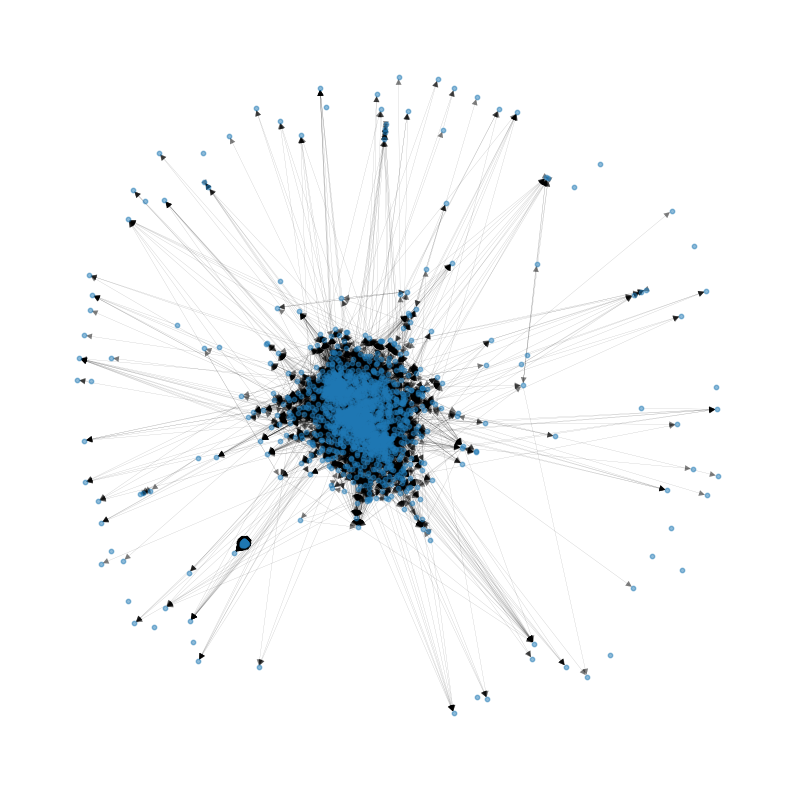

In [16]:
# display the graph
plt.figure(figsize=(10, 10))
nx.draw_networkx(G_filtered, node_size=10, alpha=0.5, with_labels=False, width=0.1)
plt.axis('off')
plt.show()

In [17]:
import community as community_louvain
from networkx.algorithms.community import greedy_modularity_communities

import matplotlib.colors as mcolors

G_filtered = G_filtered.to_undirected()

# greedy_modularity_communitiesによるコミュニティ検出
communities = greedy_modularity_communities(G_filtered)

# コミュニティのインデックス付け
community_dict = {node: -1 for node in G_filtered.nodes()}
community_dict = {node: cid for cid, community in enumerate(communities) for node in community}

# ノードの色をコミュニティに応じて設定
colors = list(mcolors.TABLEAU_COLORS.keys()) + list(mcolors.CSS4_COLORS.keys())
node_color = [colors[community_dict[node] % len(colors)] for node in G_filtered.nodes()]

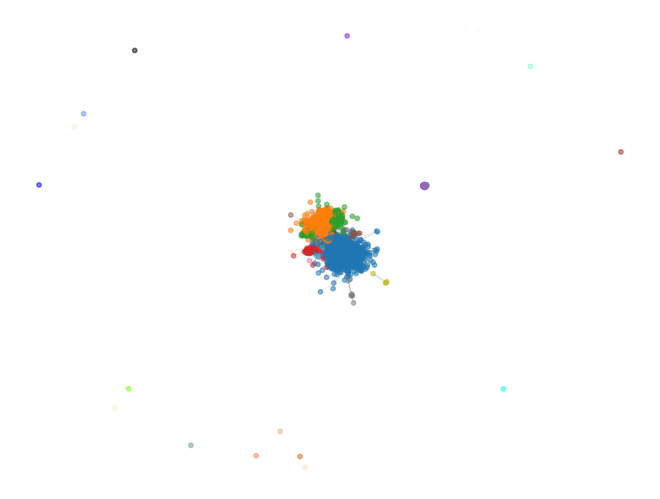

In [18]:
# グラフの描画
nx.draw(G_filtered, node_color=node_color, with_labels=False, node_size=10, alpha=0.5, width=0.1)
plt.show()

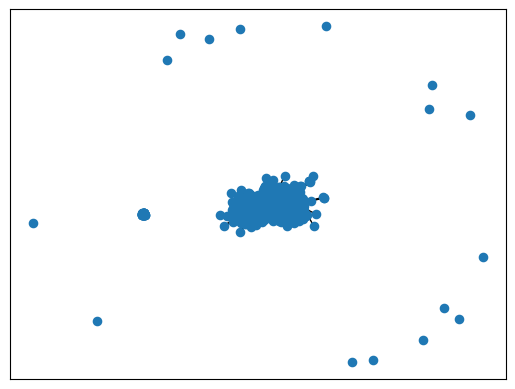

In [19]:
pos = nx.spring_layout(G_filtered)

nx.draw_networkx(G_filtered, pos, with_labels = False, node_size = 35)
plt.show()

In [20]:
len(communities)

28